# Load Dataset

In [11]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Deskripsi dari Sample Dataset

In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Sample Dataset

#### Training DataSet

Alasan saya mengambil features "PTRATIO" = Jumlah siswa yang bersekolah dibagi dengan jumlah guru di institusi dan features "AGE"= proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940. untuk mengetahui perbedaan harga rumah yang jumlah siswa dengan jumlah guru yang proper dan juga proporsi unitnya apakah dibangun sebelum tahun 1940 ataupun sebaliknya.

In [14]:
import pandas as pd

harga_rumah = {'pupil': [15.3, 17.8, 17.8, 18.7, 18.7], 
         'age': [65.2, 78.9, 61.1, 45.8, 54.2],
         'harga': [24, 21.6, 34.7, 33.4, 36.2]}

train_harga_rumah_df = pd.DataFrame(harga_rumah)
train_harga_rumah_df

,pupil,age,harga
0,15.3,65.2,24.0
1,17.8,78.9,21.6
2,17.8,61.1,34.7
3,18.7,45.8,33.4
4,18.7,54.2,36.2


### Preprocessing Dataset

In [15]:
import numpy as np

X_train = np.array(train_harga_rumah_df['pupil']).reshape(-1, 1)
y_train = np.array(train_harga_rumah_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[15.3]
 [17.8]
 [17.8]
 [18.7]
 [18.7]]

y_train: [24.  21.6 34.7 33.4 36.2]


* Untuk memnyederhanakan proses belajar kita akan mangkas jumlah features nya menjadi 1 features saja
* Kenapa perlu kita reshape ? karena pada scikit learn untuk featuresnya itu harus berada dalam array 2 dimensi

### Polynomial Regression: Quadratic

#### Polynomial Features

In [16]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.    15.3  234.09]
 [  1.    17.8  316.84]
 [  1.    17.8  316.84]
 [  1.    18.7  349.69]
 [  1.    18.7  349.69]]



* Degree merupakan derajat polynomial.
* Karena kasus kita kali ini ingin membentuk Quadratic Polynomial Regression makanya degreenya kita beri nilai "2"

#### Training Model

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

*proses transformasi polynomial dikenakan pada features dan tidak dikenakan pada targets*

Pada scikit learn tidak ada perbedaan antara implementasi Simple Linear Regression dan Polynomial Linear Regression,yang berbeda hanyalah pada polynomial regression, kita perlu melakukan transformasi features ke dalam polynomial features sebelum dilakukan proses training model

#### Visualisasi Model

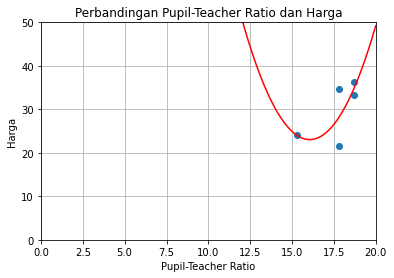

In [19]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 20, 100).reshape(-1, 1) 
X_vis_quadratic = quadratic_feature.transform(X_vis) 
y_vis_quadratic = model.predict(X_vis_quadratic) 

plt.scatter(X_train, y_train) 
plt.plot(X_vis, y_vis_quadratic, '-r') 

plt.title('Perbandingan Pupil-Teacher Ratio dan Harga')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Harga')
plt.xlim(0, 20)
plt.ylim(0, 50)
plt.grid(True)
plt.show()

* Baris 5 : visualisasikan yang pertama adalah x_train dan y_train,data training kita visualisasikan sebagai scatter plot,dan ini akan menghasilkan data point (lima titik) menrepresentasikan kelima data point pada training set kita
* Baris 6 : Memplotting hasil prediksi dari model kita,plotting sebagai line plot (plotting garis) warna merah (Untuk polynomial regression bentuknya tidak lagi garis lurus)

### Polynomial Regression: Quadratic vs Cubic

In [ ]:
# Training Set
plt.scatter(X_train, y_train) #plotting training dataset hasilnya berupa lima datapoint/lima titik

# Linear
model = LinearRegression() #membentuk model simple linear regression
model.fit(X_train, y_train) #melakukan training
X_vis = np.linspace(0, 20, 100).reshape(-1, 1) #menyiapkan 100 data point dengan jangkauan mulai dari 0 sampai 25,sebelum ditampung,kita reshape
y_vis = model.predict(X_vis) #features untuk melakukan prediksi
plt.plot(X_vis, y_vis, '--r', label='linear') #hasil prediksi ditampil secara visual,dengan garis putus-putus berwarna merah

# Quadratic
quadratic_featuriser = PolynomialFeatures(degree=2) #bedanya memiliki parameter derajat 2
X_train_quadratic = quadratic_feature.fit_transform(X_train) #melakukan fit transform terhadap nilai dari X_train
model = LinearRegression() #bentuk objek model
model.fit(X_train_quadratic, y_train) #melakukan proses training, dengan menggunakan features yang sudah kita transformasikan ke quadratic polynomial 
X_vis_quadratic = quadratic_feature.transform(X_vis) #X_vis akan kita transformasikan menjadi quadratic polynomial
y_vis = model.predict(X_vis_quadratic) #melakukan prediksi
plt.plot(X_vis, y_vis, '--g', label='quadratic') #dengan garis putus-putus berwarna hijau

# Cubic
cubic_feature = PolynomialFeatures(degree=3) #bedanya memiliki parameter derajat 2
X_train_cubic = cubic_feature.fit_transform(X_train)  #melakukan fit transform terhadap nilai dari X_train
model = LinearRegression() #bentuk objek model
model.fit(X_train_cubic, y_train) #melakukan proses training, dengan menggunakan features yang sudah kita transformasikan ke cubic polynomial 
X_vis_cubic = cubic_feature.transform(X_vis) # X_vis akan kita transformasikan menjadi cubic polynomial
y_vis = model.predict(X_vis_cubic) #melakukan prediksi
plt.plot(X_vis, y_vis, '--y', label='cubic') ##dengan garis putus-putus berwarna kuning

plt.title('Perbandingan Pupil-Teacher Ratio dan Harga Rumah')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Harga')
plt.legend()
plt.xlim(0, 20)
plt.ylim(0, 50)
plt.grid(True)
plt.show()

* Garis Putus-Putus Merah menrepresentasikan model Simple Linear Regression
* Garis Putus-Putus Hijau menrepresentasikan model Quadratic Polynomial Regression
* Garis Putus-Putus Kuning menrepresentasikan model Cubic Polynomial Regression